数据源：链家全网北京二手房数据

# 数据初探

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# 设置中文字体
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [3]:
# 在IPython中显示图表的魔法语句
%matplotlib inline

In [4]:
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python3.x 来完成项目')

导入数据并了解数据特征，包括缺失值、异常值、描述性统计

In [5]:
lianjia_df = pd.read_csv('lianjia.csv')

In [6]:
lianjia_df.head(2)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [7]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [8]:
lianjia_df.isnull().sum()

Direction        0
District         0
Elevator      8237
Floor            0
Garden           0
Id               0
Layout           0
Price            0
Region           0
Renovation       0
Size             0
Year             0
dtype: int64

In [9]:
lianjia_df.describe(include='all')

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
count,23677,23677,15440,23677.000000,23677,2.367700e+04,23677,23677.000000,23677,23677,23677.000000,23677.000000
unique,79,232,5,NaN,4526,NaN,60,NaN,16,5,NaN,NaN
top,南北,长阳,有电梯,NaN,远洋山水,NaN,2室1厅,NaN,海淀,精装,NaN,NaN
freq,11391,706,9342,NaN,102,NaN,9485,NaN,2983,11345,NaN,NaN
mean,NaN,NaN,NaN,12.765088,NaN,1.011024e+11,NaN,610.668319,NaN,NaN,99.149301,2001.326519
std,NaN,NaN,NaN,7.643932,NaN,5.652477e+05,NaN,411.452107,NaN,NaN,50.988838,9.001996
min,NaN,NaN,NaN,1.000000,NaN,1.010886e+11,NaN,60.000000,NaN,NaN,2.000000,1950.000000
25%,NaN,NaN,NaN,6.000000,NaN,1.011022e+11,NaN,365.000000,NaN,NaN,66.000000,1997.000000
50%,NaN,NaN,NaN,11.000000,NaN,1.011025e+11,NaN,499.000000,NaN,NaN,88.000000,2003.000000
75%,NaN,NaN,NaN,18.000000,NaN,1.011027e+11,NaN,717.000000,NaN,NaN,118.000000,2007.000000


In [10]:
lianjia_df.sort_values(by='Price',ascending=False).head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
20416,东南北,陶然亭,有电梯,5,朱雀门,101102721772,4室2厅,6000.0,西城,其他,376.0,2008
22254,南北,建国门内,有电梯,23,贡院六号,101102161637,5室2厅,5500.0,东城,精装,459.0,2002
3245,南北,中央别墅区,NaN,3,丽宫,101100876534,5室2厅,5000.0,顺义,精装,685.0,2007
22933,东南西,东直门,有电梯,12,NAGA上院,101102453962,6室2厅,5000.0,东城,精装,608.0,2008
23008,东南北,东直门,NaN,7,当代MOMA,101102572949,5室2厅,4988.0,东城,精装,384.0,2006
20228,南北,陶然亭,有电梯,7,耕天下,101102234163,5室3厅,4650.0,西城,其他,330.0,2003
6217,南北,沙河,NaN,2,碧水庄园,101102567394,5室3厅,4600.0,昌平,精装,571.0,2005
17311,523.4平米,大望路,精装,5,首府官邸,101102432328,叠拼别墅,4500.0,朝阳,南北,5.0,2007
2417,东南西北,中央别墅区,NaN,2,丽嘉花园,101102640126,4室2厅,4500.0,顺义,其他,548.0,2007
15353,南北,白石桥,有电梯,12,紫御府,101102494207,4室2厅,4368.0,海淀,精装,374.0,2008


In [11]:
lianjia_gy=lianjia_df.groupby(['Region'])['Price','Year'].describe()
lianjia_gy

Price                                                                 \
         count        mean         std    min     25%    50%      75%     max   
Region                                                                          
东城      1533.0  851.425245  518.139906   90.0  557.00  710.0   960.00  5500.0   
丰台      2952.0  525.103591  254.432965  145.0  360.00  465.0   619.25  4000.0   
亦庄开发区    469.0  549.876333  366.325782   90.0  295.00  485.0   717.00  3000.0   
大兴      2115.0  460.469693  272.244981  100.0  312.00  394.0   520.00  3780.0   
密云        12.0  425.333333  375.308439  210.0  237.50  262.5   339.50  1400.0   
平谷        41.0  308.658537  101.208105  190.0  245.00  285.0   340.00   780.0   
怀柔        15.0  785.200000  573.224489  220.0  371.50  530.0  1090.00  2100.0   
房山      1442.0  360.611859  172.405764   74.0  266.25  320.0   405.00  1600.0   
昌平      2811.0  469.230345  241.262467   98.0  345.00  430.0   520.00  4600.0   
朝阳      2973.0  757.320148  460.660135  190.0  438.00  635.0   910.00  4500.0   
海淀      2983.0  827.740194  494.467893  191.0  516.00  660.0   970.00  4368.0   
石景山      882.0  468.926757  240.821054  155.0  320.00  400.0   539.00  2700.0   
西城      2130.0  828.909202  464.890569  200.0  560.00  715.0   924.75  6000.0   
通州      1602.0  455.107553  242.029069   85.0  315.00  405.0   514.00  2550.0   
门头沟      496.0  388.054032  215.239704  115.0  262.00  349.0   431.00  2900.0   
顺义      1221.0  558.339885  482.825940   60.0  305.00  409.0   580.00  5000.0   

          Year                                                                  
         count         mean        std     min     25%     50%     75%     max  
Region                                                                          
东城      1533.0  1997.046967   9.389477  1950.0  1990.0  2001.0  2004.0  2016.0  
丰台      2952.0  2001.057249   7.123763  1960.0  1998.0  2002.0  2006.0  2017.0  
亦庄开发区    469.0  2006.379531   4.921270  1995.0  2003.0  2005.0  2011.0  2016.0  
大兴      2115.0  2004.778723   7.726291  1977.0  1999.0  2005.0  2012.0  2016.0  
密云        12.0  2010.500000   3.753786  2004.0  2008.5  2011.0  2012.5  2016.0  
平谷        41.0  2014.170732   1.301968  2007.0  2014.0  2014.0  2015.0  2016.0  
怀柔        15.0  2007.000000   4.675162  1997.0  2005.5  2008.0  2010.0  2012.0  
房山      1442.0  2007.755201   6.496921  1975.0  2004.0  2009.0  2013.0  2017.0  
昌平      2811.0  2003.640342   5.984838  1964.0  2000.0  2003.0  2008.0  2016.0  
朝阳      2973.0  2000.996973   7.930574  1960.0  1997.0  2004.0  2007.0  2015.0  
海淀      2983.0  1997.568555   8.550864  1955.0  1992.0  1999.0  2004.0  2016.0  
石景山      882.0  1997.604308  10.239743  1950.0  1992.0  2000.0  2006.0  2017.0  
西城      2130.0  1993.890610  11.900352  1950.0  1987.0  1996.0  2003.0  2014.0  
通州      1602.0  2005.678527   6.403438  1962.0  2002.0  2005.0  2011.0  2017.0  
门头沟      496.0  2002.685484   9.364983  1958.0  1997.0  2004.0  2010.0  2017.0  
顺义      1221.0  2005.301392   6.713645  1980.0  2001.0  2006.0  2011.0  2016.0

In [12]:
lianjia_gy.T

Region                东城           丰台        亦庄开发区           大兴           密云  \
Price count  1533.000000  2952.000000   469.000000  2115.000000    12.000000   
      mean    851.425245   525.103591   549.876333   460.469693   425.333333   
      std     518.139906   254.432965   366.325782   272.244981   375.308439   
      min      90.000000   145.000000    90.000000   100.000000   210.000000   
      25%     557.000000   360.000000   295.000000   312.000000   237.500000   
      50%     710.000000   465.000000   485.000000   394.000000   262.500000   
      75%     960.000000   619.250000   717.000000   520.000000   339.500000   
      max    5500.000000  4000.000000  3000.000000  3780.000000  1400.000000   
Year  count  1533.000000  2952.000000   469.000000  2115.000000    12.000000   
      mean   1997.046967  2001.057249  2006.379531  2004.778723  2010.500000   
      std       9.389477     7.123763     4.921270     7.726291     3.753786   
      min    1950.000000  1960.000000  1995.000000  1977.000000  2004.000000   
      25%    1990.000000  1998.000000  2003.000000  1999.000000  2008.500000   
      50%    2001.000000  2002.000000  2005.000000  2005.000000  2011.000000   
      75%    2004.000000  2006.000000  2011.000000  2012.000000  2012.500000   
      max    2016.000000  2017.000000  2016.000000  2016.000000  2016.000000   

Region                平谷           怀柔           房山           昌平           朝阳  \
Price count    41.000000    15.000000  1442.000000  2811.000000  2973.000000   
      mean    308.658537   785.200000   360.611859   469.230345   757.320148   
      std     101.208105   573.224489   172.405764   241.262467   460.660135   
      min     190.000000   220.000000    74.000000    98.000000   190.000000   
      25%     245.000000   371.500000   266.250000   345.000000   438.000000   
      50%     285.000000   530.000000   320.000000   430.000000   635.000000   
      75%     340.000000  1090.000000   405.000000   520.000000   910.000000   
      max     780.000000  2100.000000  1600.000000  4600.000000  4500.000000   
Year  count    41.000000    15.000000  1442.000000  2811.000000  2973.000000   
      mean   2014.170732  2007.000000  2007.755201  2003.640342  2000.996973   
      std       1.301968     4.675162     6.496921     5.984838     7.930574   
      min    2007.000000  1997.000000  1975.000000  1964.000000  1960.000000   
      25%    2014.000000  2005.500000  2004.000000  2000.000000  1997.000000   
      50%    2014.000000  2008.000000  2009.000000  2003.000000  2004.000000   
      75%    2015.000000  2010.000000  2013.000000  2008.000000  2007.000000   
      max    2016.000000  2012.000000  2017.000000  2016.000000  2015.000000   

Region                海淀          石景山           西城           通州          门头沟  \
Price count  2983.000000   882.000000  2130.000000  1602.000000   496.000000   
      mean    827.740194   468.926757   828.909202   455.107553   388.054032   
      std     494.467893   240.821054   464.890569   242.029069   215.239704   
      min     191.000000   155.000000   200.000000    85.000000   115.000000   
      25%     516.000000   320.000000   560.000000   315.000000   262.000000   
      50%     660.000000   400.000000   715.000000   405.000000   349.000000   
      75%     970.000000   539.000000   924.750000   514.000000   431.000000   
      max    4368.000000  2700.000000  6000.000000  2550.000000  2900.000000   
Year  count  2983.000000   882.000000  2130.000000  1602.000000   496.000000   
      mean   1997.568555  1997.604308  1993.890610  2005.678527  2002.685484   
      std       8.550864    10.239743    11.900352     6.403438     9.364983   
      min    1955.000000  1950.000000  1950.000000  1962.000000  1958.000000   
      25%    1992.000000  1992.000000  1987.000000  2002.000000  1997.000000   
      50%    1999.000000  2000.000000  1996.000000  2005.000000  2004.000000   
      75%    2004.000000  2006.000000  2003.000000  2011.000000  2010.000000  

In [13]:
lianjia_Q = lianjia_df.loc[(lianjia_df['Year']>2000)]
lianjia_Q_gy=lianjia_Q.groupby(['Region'])['Renovation','Price'].sum()
lianjia_Q_gy.head

<bound method NDFrame.head of             Price
Region           
东城       787787.1
丰台      1045710.3
亦庄开发区    230555.0
大兴       753521.1
密云         5104.0
平谷        12655.0
怀柔        11213.0
房山       472908.7
昌平       985690.4
朝阳      1649536.3
海淀      1260408.5
石景山      248440.0
西城       737850.0
通州       635163.5
门头沟      143318.0
顺义       539966.0>

In [14]:
lianjia_prices_toushi=lianjia_df.loc[(lianjia_df['Renovation']=='精装')]
lianjia_prices_toushi.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003


In [15]:
pd.pivot_table(lianjia_prices_toushi,index=['District','Layout'],values=['Price'],aggfunc=['sum','mean','max','min'])

sum         mean     max     min
                   Price        Price   Price   Price
District Layout                                      
CBD      1室1厅      610.0   610.000000   610.0   610.0
         2室1厅     2166.0  1083.000000  1570.0   596.0
         2室2厅     1599.0  1599.000000  1599.0  1599.0
         3室1厅     2625.0  1312.500000  1450.0  1175.0
         3室2厅     4630.0  1543.333333  1800.0  1150.0
         4室1厅     1330.0  1330.000000  1330.0  1330.0
七里庄      1室0厅      632.0   316.000000   316.0   316.0
         1室1厅      428.0   428.000000   428.0   428.0
         2室1厅     8075.0   475.000000   660.0   249.0
         2室2厅     1320.0   660.000000   780.0   540.0
         3室1厅     5350.0   594.444444   960.0   430.0
         3室2厅     5802.0   828.857143  1200.0   640.0
万寿路      1室1厅     1280.0   640.000000   750.0   530.0
         2室1厅     3758.0   626.333333   949.0   445.0
         3室1厅      718.0   718.000000   718.0   718.0
         4室2厅     1500.0  1500.000000  1500.0  1500.0
万柳       1室0厅     2129.0   709.666667   730.0   689.0
         1室1厅     4010.0   802.000000  1100.0   650.0
         2室1厅    26764.0  1338.200000  1800.0   930.0
         2室2厅     9080.0  1513.333333  1900.0  1250.0
         3室1厅    27220.0  1814.666667  2400.0  1350.0
         3室2厅    28624.0  2044.571429  2400.0  1500.0
         4室1厅     6900.0  2300.000000  2700.0  1900.0
         4室2厅    12480.0  3120.000000  3600.0  2600.0
         6室3厅     3250.0  3250.000000  3250.0  3250.0
三元桥      1室1厅     1421.0   710.500000   723.0   698.0
         2室1厅     8200.0  1025.000000  1420.0   360.0
         2室2厅     6339.0  1267.800000  1490.0  1150.0
         3室1厅     4380.0  1460.000000  1680.0  1350.0
         3室2厅     9360.0  1560.000000  2100.0  1350.0
...                  ...          ...     ...     ...
鲁谷       6室2厅     1400.0  1400.000000  1400.0  1400.0
黄村中      1室1厅     1626.0   271.000000   325.0   205.0
         2室1厅     9197.0   353.730769   615.0   200.0
         2室2厅     3278.0   409.750000   610.0   310.0
         3室1厅     2955.0   422.142857   610.0   277.0
         3室2厅     4505.0   643.571429   790.0   370.0
         5室2厅      900.0   900.000000   900.0   900.0
         5室3厅      950.0   950.000000   950.0   950.0
黄村北      1室1厅      300.0   300.000000   300.0   300.0
         1室2厅      335.0   335.000000   335.0   335.0
         2室1厅     1573.0   524.333333   620.0   470.0
         2室2厅     1020.0   510.000000   600.0   420.0
         3室1厅      780.0   780.000000   780.0   780.0
         3室2厅     5912.0   739.000000  1170.0   440.0
         4室2厅     3558.0   889.500000   970.0   718.0
         5室3厅     1100.0  1100.000000  1100.0  1100.0
         6室2厅      880.0   880.000000   880.0   880.0
黄村火车站    2室1厅     2226.0   318.000000   432.0   239.0
         2室2厅      289.0   289.000000   289.0   289.0
         3室1厅     1023.0   341.000000   398.0   300.0
         3室2厅      410.0   410.000000   410.0   410.0
         4室2厅      525.0   525.000000   525.0   525.0
鼓楼大街     1室0厅      648.0   216.000000   228.0   200.0
         1室1厅     1912.0   273.142857   345.0   220.0
         2室1厅    19455.0   360.277778   475.0   220.0
         2室2厅     5601.0   373.400000   500.0   308.0
         3室1厅     8030.0   472.352941   605.0   270.0
         3室2厅     7526.0   501.733333   578.0   330.0
         4室2厅     2893.0   578.600000   735.0   418.0
         5室3厅      560.0   560.000000   560.0   560.0

[1661 rows x 4 columns]

In [16]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [17]:
lianjia_df['Year'].value_counts()

2004    1758
2003    1495
2005    1404
2000    1205
2002    1155
2001    1056
2006    1039
2009     965
2007     951
2008     901
2010     830
1999     821
2012     814
1998     805
2014     651
1996     620
2013     611
2011     586
1995     580
1990     504
1997     493
1992     431
1994     415
2015     359
1993     328
1988     297
1985     290
1980     258
1987     253
1989     249
        ... 
2016     117
1981      85
1979      84
1978      41
1970      41
1976      31
1958      25
1977      21
1974      18
2017      17
1960      16
1975      13
1965      13
1950      12
1964      11
1957       9
1955       9
1956       9
1959       8
1963       7
1973       5
1962       5
1954       4
1971       4
1966       3
1967       3
1968       2
1961       1
1953       1
1952       1
Name: Year, Length: 65, dtype: int64

# 清洗数据

In [18]:
df = lianjia_df.copy()
df.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [19]:
lianjia_df.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [20]:
# 添加新特征--房屋均价
df['PerPrice'] = df['Price'] / df['Size']
df['PerPrice'].describe()

count    23677.000000
mean         6.643968
std         13.396553
min          1.223404
25%          4.269231
50%          5.569620
75%          8.000000
max       1000.000000
Name: PerPrice, dtype: float64

In [21]:
# 重新摆放列的位置--对应列名的列数据整体移位(只是看起来比较舒适)，同时移除了Id列的数据
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)
df.head()

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0


# 数据可视化分析

In [22]:
# 对二手房区域分组并对比二手房数量和每平米房价

# 按二手房区域分组：在分组的基础上对PerPrice数据求平均计算--排序--将数组转换成DataFrame格式--重置索引
# 因为数据清洗时，会将带空值的行删除，此时DataFrame或Series类型的数据不再是连续的索引，可以使用reset_index()重置索引。
df_house_mean=df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
# 按二手房区域分组，在分组的基础上对District数据求和计算
df_house_count=df.groupby('Region')['District'].count().sort_values(ascending=False).to_frame().reset_index()

In [23]:
df_house_count.head()

,Region,District
0,海淀,2983
1,朝阳,2973
2,丰台,2952
3,昌平,2811
4,西城,2130


In [24]:
df_house_mean.head()

,Region,PerPrice
0,西城,10.688348
1,东城,9.864243
2,海淀,8.847025
3,朝阳,7.317792
4,丰台,6.098628


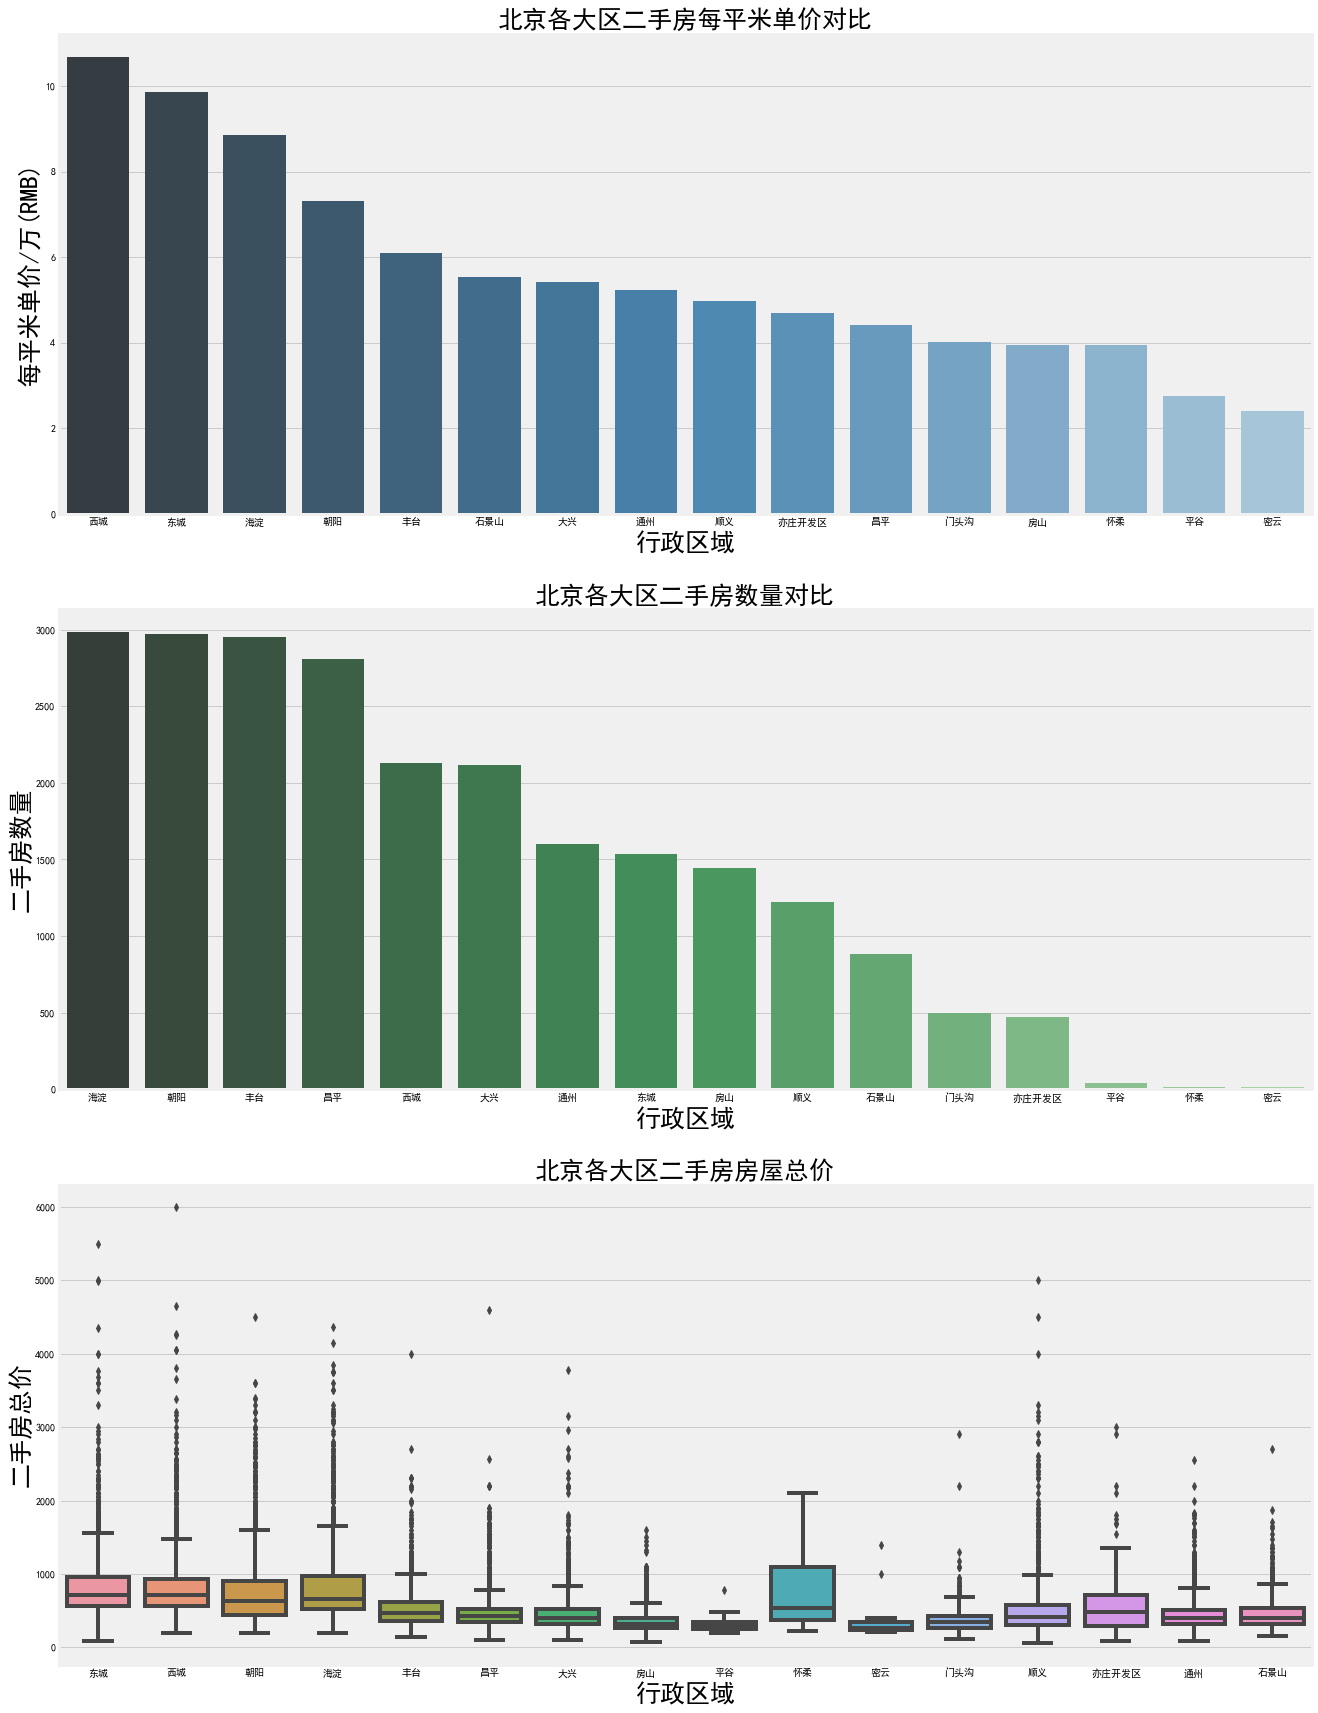

In [25]:
# 设置可视化图表--设置三张画布，按照3列1行排布，画布大小按照20*30显示
f,[ax1,ax2,ax3]=plt.subplots(3,1,figsize=(20,30))

# 柱状图
sns.barplot(x='Region',y='PerPrice',palette='Blues_d',data=df_house_mean,ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=25)
ax1.set_xlabel('行政区域',fontsize=25)
ax1.set_ylabel('每平米单价/万(RMB)',fontsize = 25)

sns.barplot(x='Region',y='District',palette='Greens_d',data=df_house_count,ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=25)
ax2.set_xlabel('行政区域',fontsize=25)
ax2.set_ylabel('二手房数量',fontsize=25)

# 箱体图
sns.boxplot(x='Region',y='Price',data=df,ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=25)
ax3.set_xlabel('行政区域',fontsize=25)
ax3.set_ylabel('二手房总价',fontsize=25)

plt.show()

Size特征分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


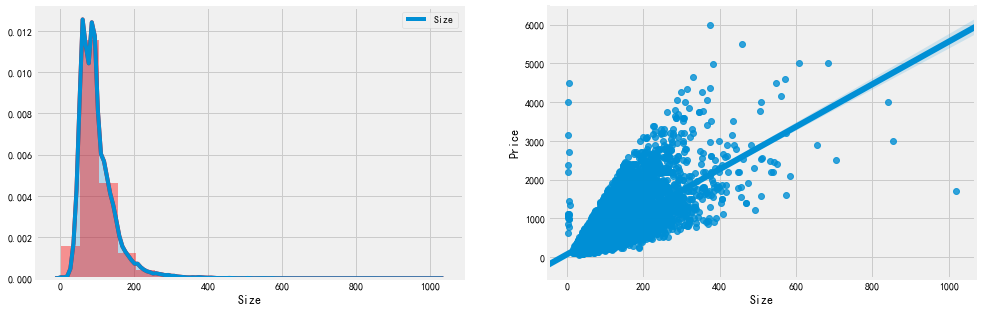

In [26]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))

# 建房时间的分布情况
# distplot直方图：可以看出产品质量特性的分布状态，便于判断其总体质量分布情况，通过沿数据范围形成分箱，绘制条以显示落入每个分箱的观测次数的数据分布
# kdeplot核导密度图：核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，可以比较直观的看出数据样本本身的分布特征
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
sns.kdeplot(df['Size'],shade=True,ax=ax1)

# 建房时间和出售价格的关系
# regplot:利用线性回归模型对数据进行拟合
sns.regplot(x='Size',y='Price',data=df,ax=ax2)

plt.show()

In [27]:
df.loc[df['Size']<10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


In [28]:
df.loc[df['Size']>1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


再次进行数据清洗--移除异常数据

In [29]:
df=df[(df['Layout'] != '叠拼别墅')&(df['Size']<1000)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23656 entries, 0 to 23676
Data columns (total 12 columns):
Region        23656 non-null object
District      23656 non-null object
Garden        23656 non-null object
Layout        23656 non-null object
Floor         23656 non-null int64
Year          23656 non-null int64
Size          23656 non-null float64
Elevator      15419 non-null object
Direction     23656 non-null object
Renovation    23656 non-null object
PerPrice      23656 non-null float64
Price         23656 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 2.3+ MB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


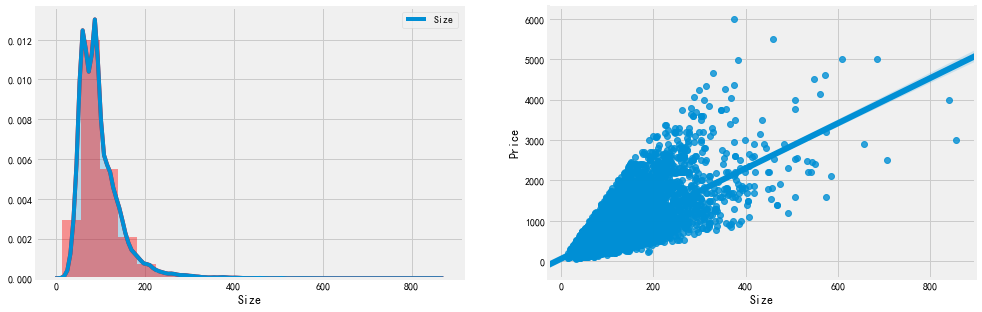

In [31]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))

# 建房时间的分布情况
sns.distplot(df['Size'],bins=20,ax=ax1,color='r')
sns.kdeplot(df['Size'],shade=True,ax=ax1)

# 建房时间和出售价格的关系
sns.regplot(x='Size',y='Price',data=df,ax=ax2)

plt.show()

Layout特征分析

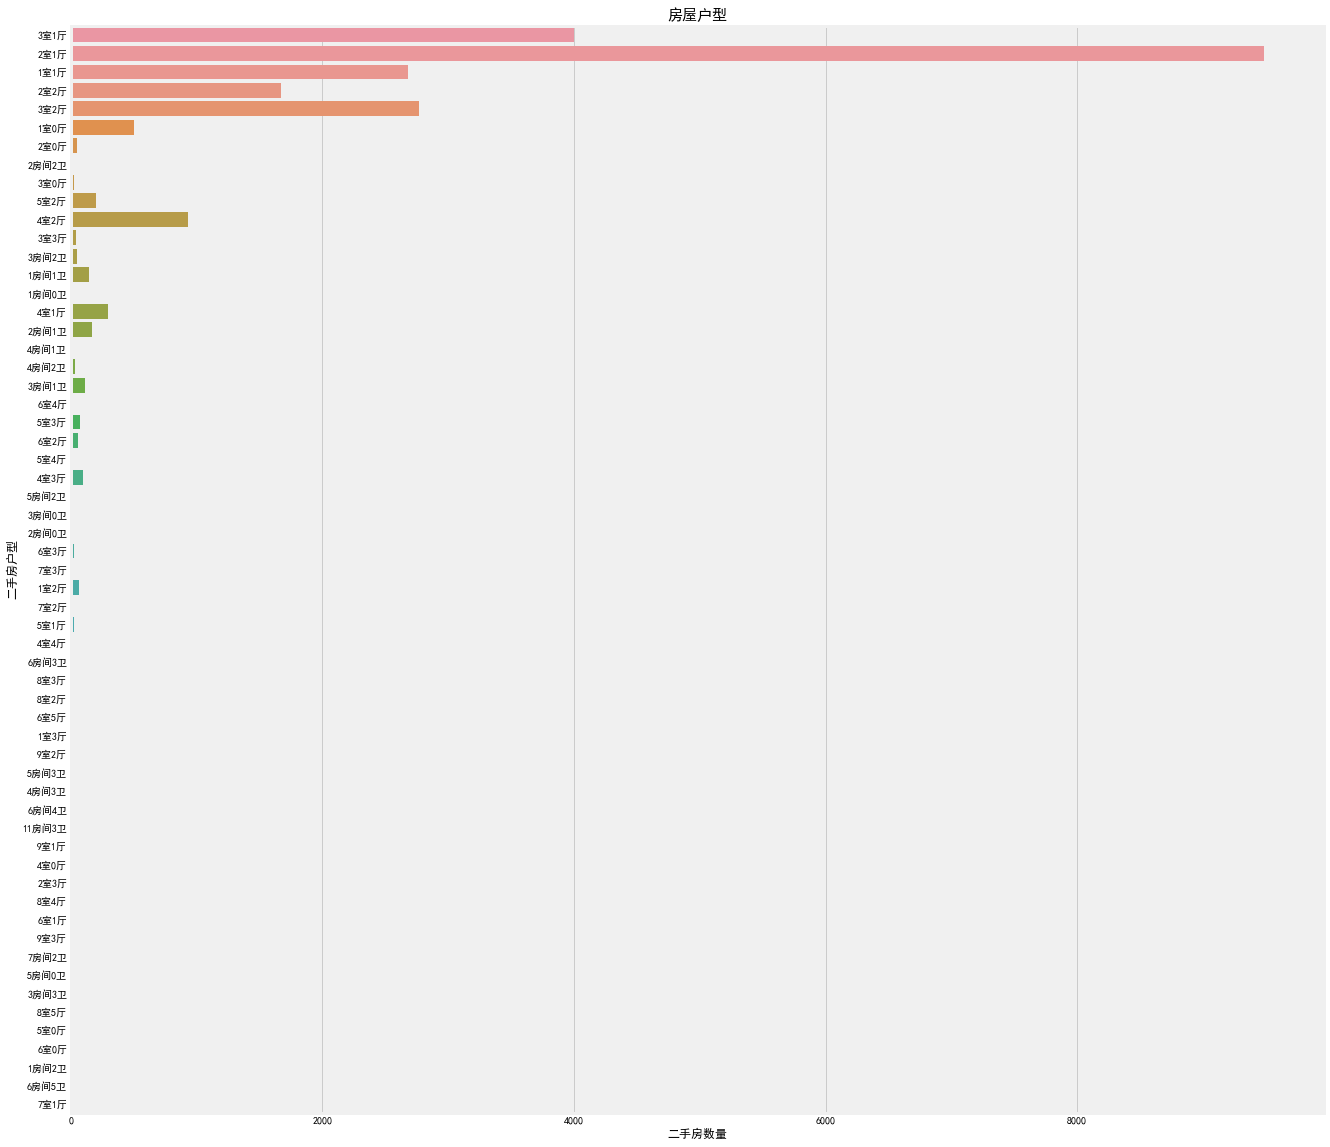

In [32]:
f,ax1=plt.subplots(figsize=(20,20))

# 房屋户型分析
sns.countplot(y='Layout',data=df,ax=ax1)

ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('二手房数量')
ax1.set_ylabel('二手房户型')

plt.show()

Renovation特征分析

In [33]:
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


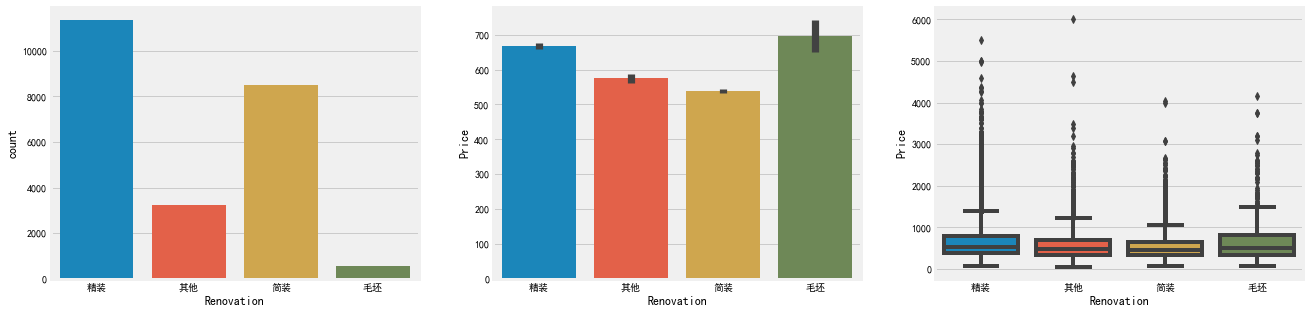

In [34]:
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))

# 装修风格与房屋总价分析
sns.countplot(df['Renovation'],ax=ax1)
sns.barplot(x='Renovation',y='Price',data=df,ax=ax2)
sns.boxplot(x='Renovation',y='Price',data=df,ax=ax3)

plt.show()

Elevator特征分析

In [35]:
misn=len(df.loc[(df['Elevator'].isnull()),'Elevator'])
print('Elevator缺失值数量为：'+str(misn))

Elevator缺失值数量为：8237


In [36]:
df['Elevator'].value_counts()

有电梯    9341
无电梯    6078
Name: Elevator, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


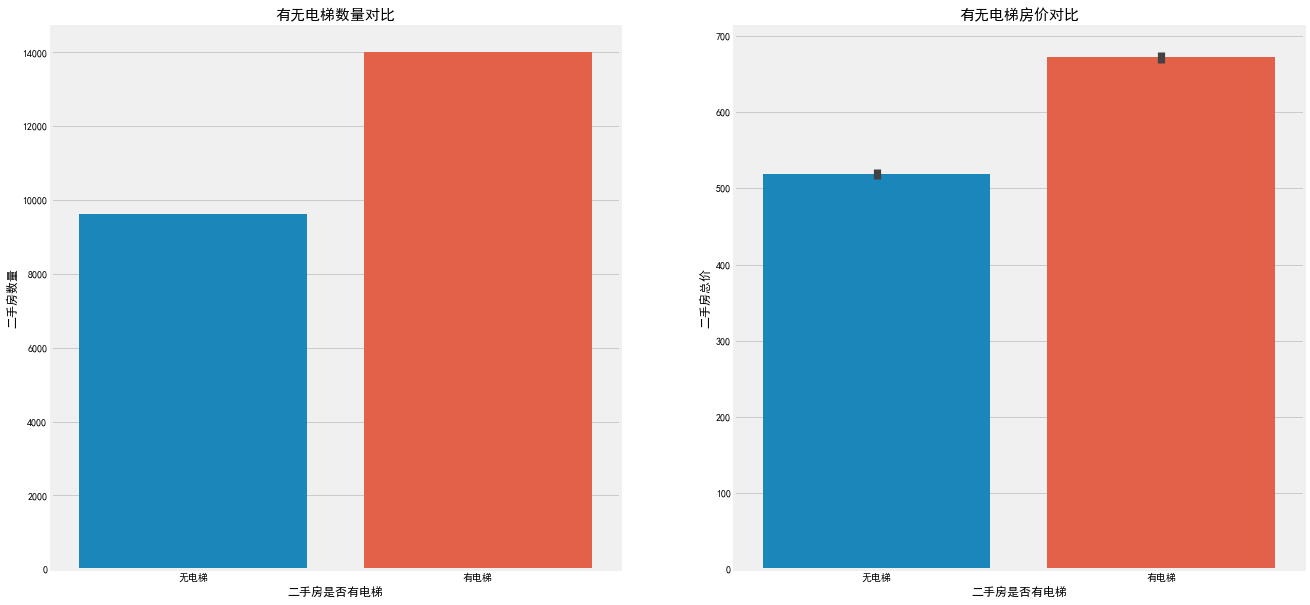

In [37]:
# 由于存在个别类型错误，如特征值错位，这类数据需要移除

df['Elevator'] = df.loc[(df['Elevator']=='有电梯') | (df['Elevator']=='无电梯'), 'Elevator']

# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()),'Elevator']='有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()),'Elevator']='无电梯'

f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))

sns.countplot(df['Elevator'],ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('二手房是否有电梯')
ax1.set_ylabel('二手房数量')

sns.barplot(x='Elevator',y='Price',data=df,ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('二手房是否有电梯')
ax2.set_ylabel('二手房总价')

plt.show()

In [38]:
df['Elevator'].value_counts()

有电梯    14024
无电梯     9632
Name: Elevator, dtype: int64

Year特征分析

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


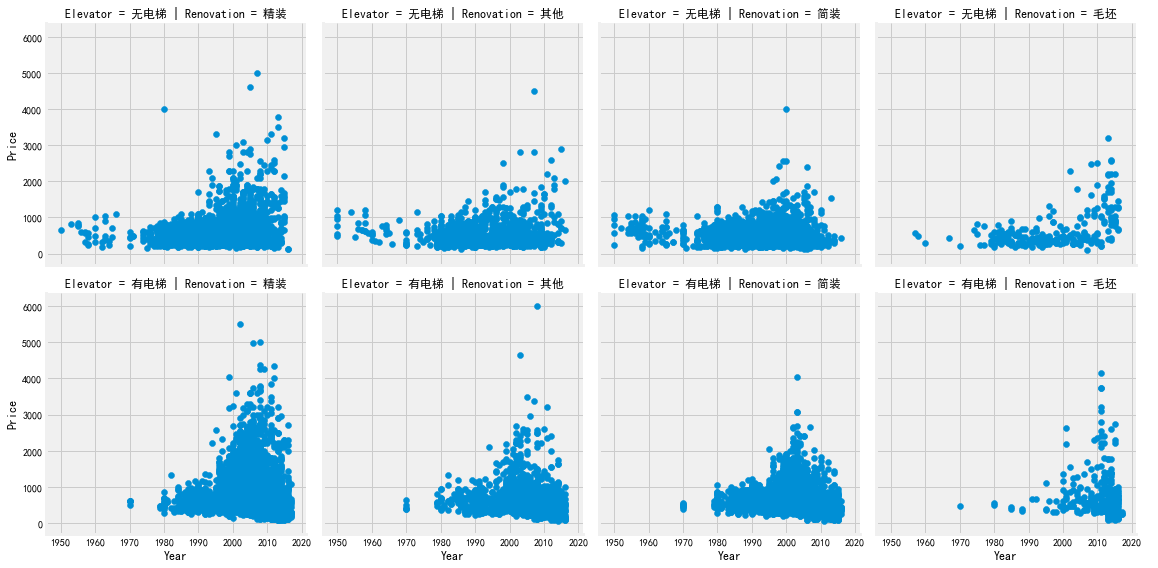

In [39]:
grid = sns.FacetGrid(df,row='Elevator',col='Renovation',palette='seismic',size=4)
grid.map(plt.scatter,'Year','Price')
grid.add_legend()

Floor特征分析

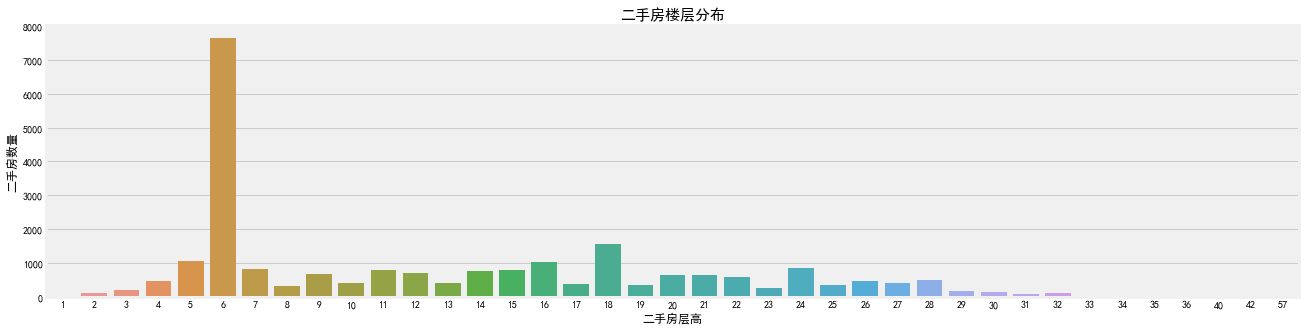

In [40]:
f,ax1=plt.subplots(figsize=(20,5))

sns.countplot(x='Floor',data=df,ax=ax1)
ax1.set_title('二手房楼层分布',fontsize=15)
ax1.set_xlabel('二手房层高')
ax1.set_ylabel('二手房数量')

plt.show()